In [1]:
pwd

'/Users/zofia/github/DFM/interactivePython'

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import sys
import os
sys.path.append('/Users/zofia/github/DFM/srcDiffmap')

import mdtraj as md

import integrator
import sampler #as sampler
import model #as model
import diffusionmap as dm
import statistics_dfm as stat

import numpy as np
from simtk import openmm, unit
from openmmtools.constants import kB

import model
mdl=model.Model('Dimer')
print (mdl.x_unit)
print('System has %d particle(s)' % mdl.system.getNumParticles())
print (mdl.testsystem.positions)
X0=mdl.testsystem.positions.value_in_unit(mdl.x_unit)
print('Initial distance is %f' % np.linalg.norm(X0[0,:]-X0[ 1,:]))

algoVect=0

# parameters
# this is the target temperature 
T=100.0
temperature =  T * unit.kelvin#300 * unit.kelvin
kT = kB * temperature


gamma = 1.0 / unit.picosecond
dt = 2.0 * unit.femtosecond

TemperatureTAMDFactor=30.0
massScale=50.0

gammaScale=100.0
kappaScale=1000.0

print("TemperatureTAMDFactor = " + repr(TemperatureTAMDFactor))
temperatureAlpha= (T*TemperatureTAMDFactor)* unit.kelvin

print('Gamma is '+repr(gamma))
print('Temperature is '+repr(temperature))
print('Temperature TAMD '+repr(TemperatureTAMDFactor)+'xTemperature')
print('Mass alpha is '+repr(massScale)+'x Mass')



# simulation class sampler takes integrator class with chosen parameters as input
integrator=integrator.Integrator( model=mdl, gamma=gamma, temperature=temperature, temperatureAlpha=temperatureAlpha, dt=dt, massScale=massScale, gammaScale=gammaScale, kappaScale=kappaScale)
samplerAlgo=sampler.Sampler(model=mdl, integrator=integrator, algorithm=0, dataFileName='Data')

# nrSteps is number of steps for each nrRep , and iterate the algo nrIterations times - total simulation time is nrSteps x nrIterations
# nrSteps=args.nrSteps
# nrEquilSteps = 10 #10000
# nrIterations=args.niterations
# nrRep=args.nreplicas

algoNames=samplerAlgo.algorithmName

simulatedTemperature=1000



Dimer model: double-well with 2 states
State1: r=Quantity(value=1.55, unit=angstrom)
State2: r=Quantity(value=2.55, unit=angstrom)
Dimer model: double-well with 2 states
State1: r=Quantity(value=1.55, unit=angstrom)
State2: r=Quantity(value=2.55, unit=angstrom)
angstrom
System has 2 particle(s)
[[ 0.          0.          0.        ]
 [ 1.54999995  0.          0.        ]] A
Initial distance is 1.550000
TemperatureTAMDFactor = 30.0
Gamma is Quantity(value=1.0, unit=/picosecond)
Temperature is Quantity(value=100.0, unit=kelvin)
Temperature TAMD 30.0xTemperature
Mass alpha is 50.0x Mass
105.908469558 K


In [2]:
colorList=['red', 'blue', 'black', 'green']
    
# copy values for the two states from above
min1=1.55*model.unit.angstroms
min2=2.55*model.unit.angstroms


In [4]:
#---------------- load trajectories: for example from simulation at higher temperature
import glob
numpy_vars = []
for np_name in glob.glob('/Users/zofia/github/DFM/Data/Std/Traj/T'+repr(simulatedTemperature)+ '/*.h5'):
    numpy_vars.append(md.load(np_name))

traj = numpy_vars
print(len(traj))


import mdtraj as md
Xmdtraj=list()
for i in range(len(traj)):
    Xmdtraj.append(md.Trajectory(traj[i].xyz, mdl.testsystem.topology) )

print(Xmdtraj[0].xyz.shape[2])
L=int(Xmdtraj[0].xyz.shape[0]*len(traj))
nrP=int(Xmdtraj[0].xyz.shape[1])
D=int(Xmdtraj[0].xyz.shape[2])
X=np.zeros((L, nrP, D))
for i in range(0,len(Xmdtraj)):
        X[i*len(Xmdtraj[i].xyz):(i+1)*len(Xmdtraj[i].xyz),:,:]=Xmdtraj[i].xyz

Xref=X


10
3


3
(1000, 2, 3)
(1000,)


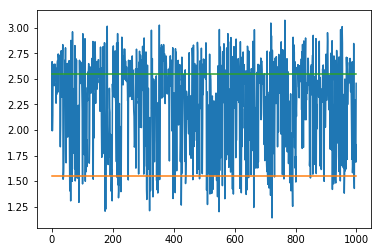

Initial radius: 1.9962540405982552
Mean radius: 2.2373899151673493


In [5]:

import mdtraj as md
Xmdtraj=list()
for i in range(len(traj)):
    Xmdtraj.append(md.Trajectory(traj[i].xyz, mdl.testsystem.topology) )

print(Xmdtraj[0].xyz.shape[2])
L=int(Xmdtraj[0].xyz.shape[0]*len(traj))
nrP=int(Xmdtraj[0].xyz.shape[1])
D=int(Xmdtraj[0].xyz.shape[2])
X=np.zeros((L, nrP, D))
for i in range(0,len(Xmdtraj)):
        X[i*len(Xmdtraj[i].xyz):(i+1)*len(Xmdtraj[i].xyz),:,:]=Xmdtraj[i].xyz

print(X.shape)

#---------------- radius 
r=np.linalg.norm(X[:,0,:]-X[:,1,:], 2, axis=1)
print(r.shape)

plt.plot(range(len(r)), r)
plt.plot(range(len(r)), np.ones(len(r))*min1)
plt.plot(range(len(r)), np.ones(len(r))*min2)
plt.show()

print("Initial radius: "+repr(np.linalg.norm(X[0, 0,:]-X[0, 1,:])))
print("Mean radius: " +repr(np.mean(r)))


In [5]:
Xmdtraj=md.Trajectory(X, mdl.testsystem.topology)

print(Xmdtraj[-1].xyz)
Xmdtraj=Xmdtraj.superpose(Xmdtraj[0])
print(Xmdtraj[-1].xyz)

Xxyz= Xmdtraj.xyz
Xres=Xxyz.reshape(Xxyz.shape[0], Xxyz.shape[1]*Xxyz.shape[2])
print(Xres.shape)



[[[ 261.11309814  336.806427   -405.93588257]
  [ 263.43356323  337.44747925 -406.42138672]]]
[[[-7.68952036  5.11203194 -6.56193447]
  [-5.36905527  5.75308418 -7.04743862]]]
(1000, 6)


In [6]:
import imp

imp.reload(dm)

dE=dm.myEuclideanMetric(Xres[0], Xres[-1])

print(dE)

dRmsd=dm.myRMSDmetric(Xres[0], Xres[-1])

print(dRmsd)


Dimer model: double-well with 2 states
State1: r=Quantity(value=1.55, unit=angstrom)
State2: r=Quantity(value=2.55, unit=angstrom)
2.03379099443
[ 0.22952959]


In [7]:
#---------- VISUALISATION OF THE MOLECULE
#align according to first frame
traj[0]=traj[0].superpose(traj[0][0])
tpl=traj[0].topology
print(tpl)
import nglview as nv
view = nv.show_mdtraj(traj[0])

view.add_representation('spacefill', selection='all' )
view.frame = 10
view

#--- saving as gif: does not work :(
# from nglview.contrib.movie import MovieMaker
# movie = MovieMaker(view, output='my.gif')
# movie.make()


<mdtraj.Topology with 1 chains, 1 residues, 2 atoms, 0 bonds>


A Jupyter Widget

In [8]:
def plotResults(freeEnergyUnWeighted, freeEnergyWeighted, V1, lm, Epot, r):
    print(freeEnergyUnWeighted)
    freeEnergy=freeEnergyUnWeighted
    #plt.scatter(v1TMDiffmap, Epot)
    plt.plot(V1[lm], freeEnergy, '*-b')
    plt.xlabel('V1')
    plt.ylabel('Free energy ln(pi(V1(x)))')
    plt.show()

    plt.plot(r[lm], freeEnergyWeighted, '*-b')
    plt.plot(r[lm], freeEnergyUnWeighted, '*-r')
    plt.xlabel('r')
    plt.ylabel('Free energy ln(pi(V1(x)))')
    plt.show()


    plt.scatter(  V1, Epot)
    plt.plot( V1[lm],Epot[lm], '*-r')
    plt.xlabel('V1')
    plt.ylabel('potential energy')
    plt.show()

    plt.scatter(  r, Epot, c=V1)
    plt.plot(  r[lm], Epot[lm], '-*r')
    plt.xlabel('r')
    plt.ylabel('potential energy')
    plt.show()

    plt.scatter(  r, V1)
    plt.plot(  r[lm], V1[lm], '*-r')
    plt.xlabel('r')
    plt.ylabel('V1')
    plt.show()
    
def plotAndSaveResults(freeEnergyUnWeighted, freeEnergyWeighted, V1, lm, Epot, r):
    #print(freeEnergyUnWeighted)
    #freeEnergy=freeEnergyUnWeighted
    #plt.scatter(v1TMDiffmap, Epot)
    plt.plot(V1[lm], freeEnergyUnWeighted, '*-b')
    plt.xlabel('V1')
    plt.ylabel('Free energy ln(pi(V1(x)))')
    plt.show()#('V1_freeEn.png')

    plt.plot(r[lm], freeEnergyWeighted, '*-b')
    plt.plot(r[lm], freeEnergyUnWeighted, '*-r')
    plt.xlabel('r')
    plt.ylabel('Free energy ln(pi(V1(x)))')
    plt.show()
    #plt.save('r_freeEn.png')

    plt.scatter(  V1, Epot)
    plt.plot( V1[lm],Epot[lm], '*-r')
    plt.xlabel('V1')
    plt.ylabel('potential energy')
    plt.show()
    
    
    #plt.save('V1_ePot.png')

    plt.scatter(  r, Epot, c=V1)
    plt.plot(  r[lm], Epot[lm], '-*r')
    plt.xlabel('r')
    plt.ylabel('potential energy')
    plt.show()
   
    plt.scatter(  r, Epot, c=V1)
    #plt.plot(  r[lm], Epot[lm], '-*r')
    plt.colorbar()
    plt.xlabel('radius')
    plt.ylabel('potential energy')
    plt.show()
   
    #plt.save('r_ePot.png')

    plt.scatter(  r, V1)
    plt.plot(  r[lm], V1[lm], '*-r')
    plt.xlabel('r')
    plt.ylabel('V1')
    plt.show()
    
    plt.scatter(  r, V1)
    #plt.plot(  r[lm], V1[lm], '*-r')
    plt.xlabel('radius')
    plt.ylabel('dominant eigenvector')
    plt.show()
    
    plt.scatter(  r,   Epot, c=V1)
    plt.plot(  r[lm], freeEnergyUnWeighted, '-*b')
    plt.xlabel('radius')
    plt.legend(['dominant eigenvector', 'free energy'])
    plt.show()
    #plt.save('r_V1.png')
    
    plt.scatter( range(len(r)), r, c=V1)

    plt.xlabel('simulation steps')
    plt.ylabel('radius')
    plt.show()
    
def plotCompareResults(fe1, fe2, v11 , v12,  lm1, lm2, r1, r2):
    #print(freeEnergyUnWeighted)
    
  
    plt.plot(r1[lm1], fe1, '*-b')
    plt.plot(r2[lm2], fe2, '*-r')
    plt.xlabel('r')
    plt.ylabel('Free energy ln(pi(V1(x)))')
    plt.show()



In [9]:
import imp
imp.reload(sampler)
imp.reload(dm)
imp.reload(stat)

def FE(tr, eps, numberOfLandmarks, smpl, model, T, method): 
        
        tr_orig=tr
        
        tmp=md.Trajectory(tr, model.testsystem.topology)
        tmp = tmp.superpose(tmp[0])
        #------ reshape data ------------------------------

        tmp =  tmp.xyz.reshape((tmp.xyz.shape[0], tmp.xyz.shape[1]*tmp.xyz.shape[2]))
                
        tr=tmp
        v1, qTarget, qEmp, Epot, kernel=sampler.dominantEigenvectorDiffusionMap(tr, eps, smpl, T, method)
        
        #qTargetNormalized = qTarget/np.sum(qTarget)
        
        #get landmarks
        lm, levelsets, linspV = dm.get_landmarks(tr, numberOfLandmarks, qTarget, v1, Epot, getLevelSets=True)
        
        levelsets, levels = dm.get_levelsets(tr, numberOfLandmarks, qTarget, v1);
        
        tr =  tr.reshape((tr_orig.shape[0], tr_orig.shape[1],tr_orig.shape[2]))
        
        return tr, levelsets, v1, lm, qEmp, Epot, qTarget


def computeFreeEnergyAtLandmarkedPoint(qTarget, qEmp, levelsets, method='weighted'):
      
        if(method=='weighted'):
            weight, Ntilde = stat.compute_weight_target_distribution(qTarget, qEmp)
        
        
        K=len(levelsets)
        
        freeEnergy=np.zeros(K)
        h=np.zeros(K)

        for k in range(0,K):
            # simple histogram
            if(method == 'raw'):
                h[k] = np.sum(len(levelsets[k]))
            elif(method=='weighted'):
#              # unbiased histogram- we can use weights!!
                h[k] = np.sum(weight[levelsets[k]])
            
        for k in range(0,K):
            if(h[k] == 0):
                freeEnergy[k] = 0 # if the bin is empty set 0
            else:
                if(method == 'raw'):
                    freeEnergy[k] = -np.log(h[k]/sum(h))
                elif(method=='weighted'):
#              
                    freeEnergy[k] =  -np.log( h[k]/sum(h) / Ntilde)
                
                
        
                
        if(method=='weighted'):
            return freeEnergy, weight, Ntilde
        else:
            return freeEnergy




Dimer model: double-well with 2 states
State1: r=Quantity(value=1.55, unit=angstrom)
State2: r=Quantity(value=2.55, unit=angstrom)


In [10]:
numberOfLandmarks=50
epsilon=1

Xshort=X
while(len(Xshort)>2000):
    Xshort=Xshort[::2]
#Xshort=X[::10]
print("Shape of input data: "+repr((Xshort.shape)))

# note that samplerAlgo.T gives the target temperature from the at the beginning initialized class
print("Target temperature is "+repr(samplerAlgo.T))


# target temperature T= low temperature 100K
XspTGT,levelsetsTGT, V1TGT, lmTGT, qEmpTGT, EpotTGT, qTargetTGT =FE(Xshort, epsilon, numberOfLandmarks, samplerAlgo, samplerAlgo.model, samplerAlgo.T, 'TMDiffmap')#'TMDiffmap')#'Diffmap')




Shape of input data: (1000, 2, 3)
Target temperature is Quantity(value=100.0, unit=kelvin)
Temperature in dominantEigenvectorDiffusionMap is Quantity(value=100.0, unit=kelvin)
constructing neighbor graph
neighbor graph done


In [11]:

print("Target temperature is "+repr(samplerAlgo.T))
#qTargetTGT=np.exp(-EpotTGT/samplerAlgo.T)

freeEnergyWeightedTGT, weightTGT, NtildeTGT= computeFreeEnergyAtLandmarkedPoint(qTargetTGT, qEmpTGT, levelsetsTGT, method='weighted')
freeEnergyRawTGT= computeFreeEnergyAtLandmarkedPoint(qTargetTGT, qEmpTGT, levelsetsTGT, method='raw')


rTGT=np.linalg.norm(XspTGT[:,0,:]-XspTGT[:,1,:], 2, axis=1)



Target temperature is Quantity(value=100.0, unit=kelvin)


In [12]:
print(freeEnergyRawTGT)

[ 4.28148986  3.91376508  3.64550109  3.49978928  3.34322022  3.21295502
  3.12530772  3.10912239  3.09771976  3.13232529  3.18782807  3.27326163
  3.36965348  3.42786286  3.55555285  3.68550642  3.81612661  3.89345981
  3.99380778  4.0106149   4.08081916  4.18281833  4.26678371  4.28892484
  4.33473437  4.38274359  4.32695223  4.31923018  4.32695223  4.3584509
  4.39097409  4.3584509   4.30396271  4.28148986  4.18281833  4.15632671
  4.1241696   4.11159082  4.1694848   4.14981203  4.18281833  4.23093758
  4.32695223  4.4245907   4.57164412  4.78004539  5.01237737  5.254939
  5.35812324  5.85456013]


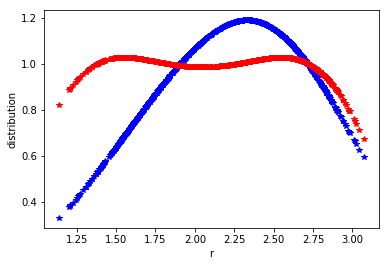

In [13]:
#qTarget=np.exp(-Epot/samplerAlgo.T)
plt.plot(rTGT, qEmpTGT/np.mean(qEmpTGT), '*b')
plt.plot(rTGT, qTargetTGT/np.mean(qTargetTGT), '*r')
plt.xlabel('r')
plt.ylabel('distribution')
plt.show()

In [14]:
#simulated temperature 
print("Simulated temperature is "+repr(simulatedTemperature))

XspST,levelsetsST, V1ST, lmST, qEmpST, EpotST, qTargetST =FE(Xshort, epsilon, numberOfLandmarks, samplerAlgo, samplerAlgo.model, simulatedTemperature, 'TMDiffmap')#'TMDiffmap')#'Diffmap')


print("Target temperature is "+repr(simulatedTemperature))
#qTargetST=np.exp(-EpotST/simulatedTemperature)

freeEnergyWeightedST, weightST, NtildeST= computeFreeEnergyAtLandmarkedPoint(qTargetST, qEmpST, levelsetsST, method='weighted')
freeEnergyRawST= computeFreeEnergyAtLandmarkedPoint(qTargetST, qEmpST, levelsetsST, method='raw')


rST=np.linalg.norm(XspST[:,0,:]-XspST[:,1,:], 2, axis=1)




Simulated temperature is 1000
Temperature in dominantEigenvectorDiffusionMap is 1000
constructing neighbor graph
neighbor graph done
Target temperature is 1000


[ 4.28148986  3.91376508  3.64550109  3.49978928  3.34322022  3.21295502
  3.12530772  3.10912239  3.09771976  3.13232529  3.18782807  3.27326163
  3.36965348  3.42786286  3.55555285  3.68550642  3.81612661  3.89345981
  3.99380778  4.0106149   4.08081916  4.18281833  4.26678371  4.28892484
  4.33473437  4.38274359  4.32695223  4.31923018  4.32695223  4.3584509
  4.39097409  4.3584509   4.30396271  4.28148986  4.18281833  4.15632671
  4.1241696   4.11159082  4.1694848   4.14981203  4.18281833  4.23093758
  4.32695223  4.4245907   4.57164412  4.78004539  5.01237737  5.254939
  5.35812324  5.85456013]


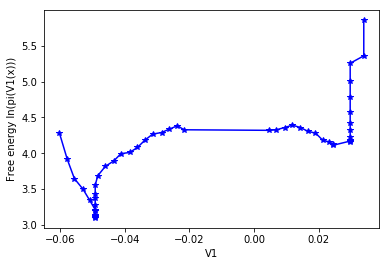

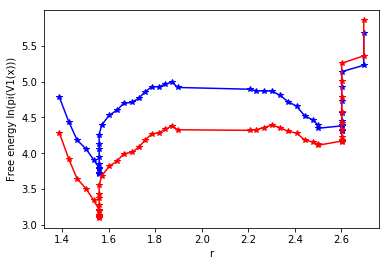

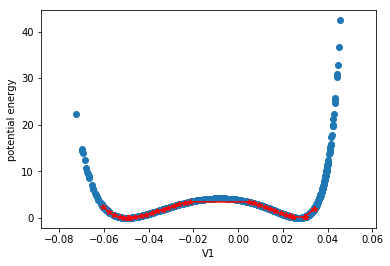

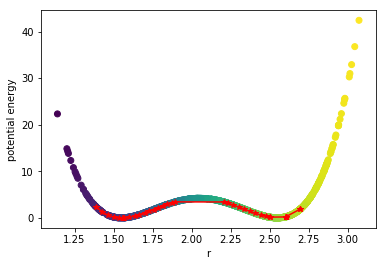

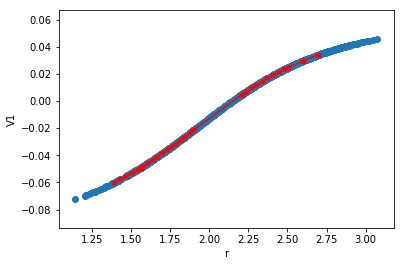

[ 6.02071991  5.43757362  5.32757272  5.12123629  4.82932588  4.67698516
  4.46257529  4.36249183  4.2642998   4.20834115  4.18813844  4.20156146
  4.14252793  4.15534862  4.1814939   4.22203999  4.32357641  4.32357641
  4.38658938  4.41128199  4.37046     4.33896133  4.33123929  4.33896133
  4.39475269  4.34674347  4.29349896  4.25713131  4.19482743  4.07480976
  4.01138793  4.0002767   3.88065374  3.81427867  3.66934465  3.54278192
  3.41187635  3.34657126  3.25335313  3.1561409   3.12803601  3.09175085
  3.09845478  3.12113149  3.20232165  3.31824075  3.48174603  3.61904391
  3.86605494  4.1814939 ]


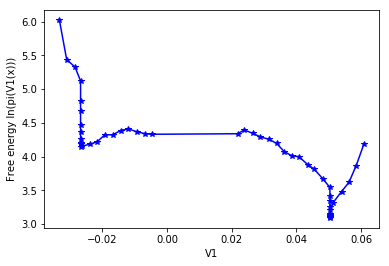

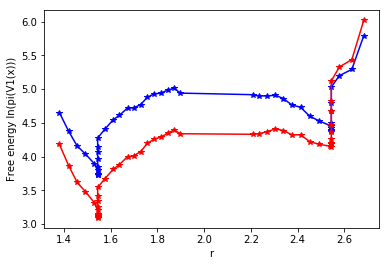

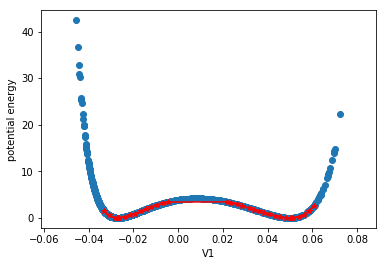

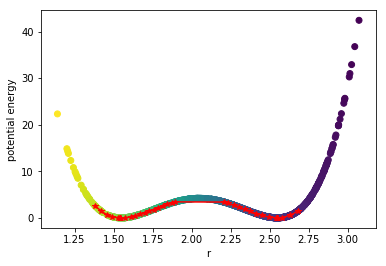

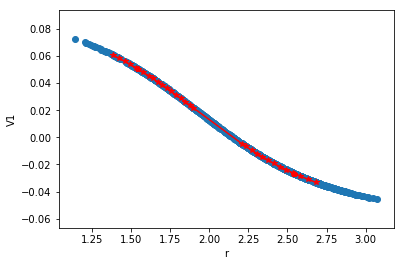

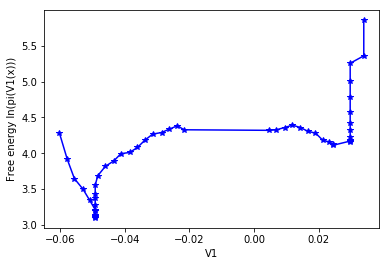

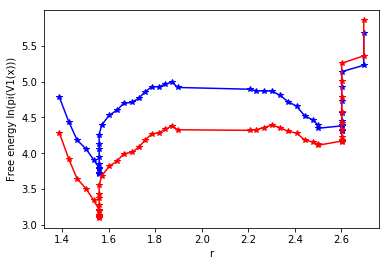

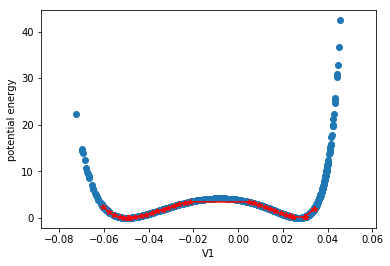

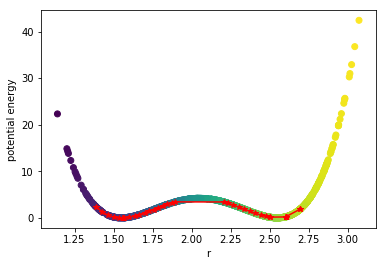

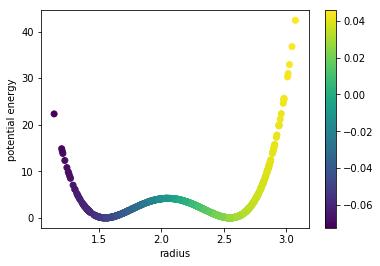

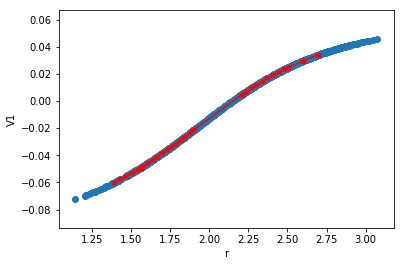

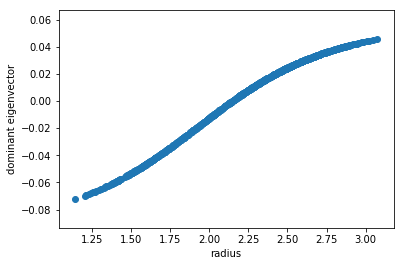

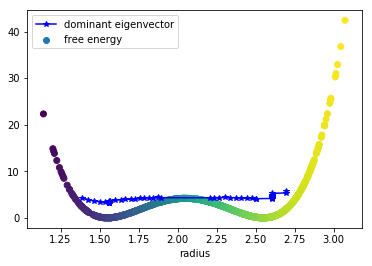

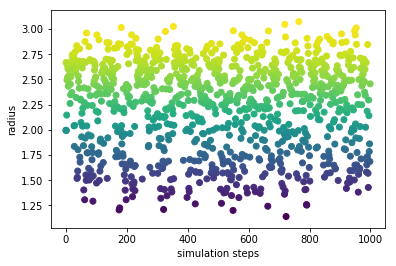

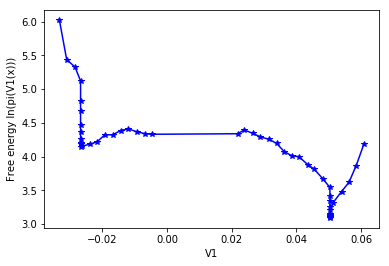

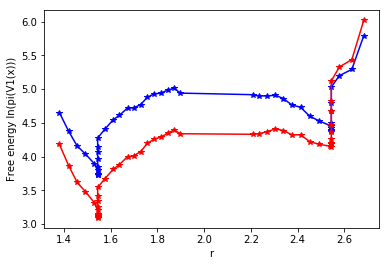

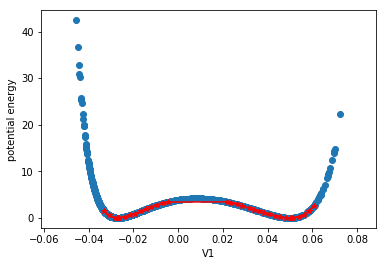

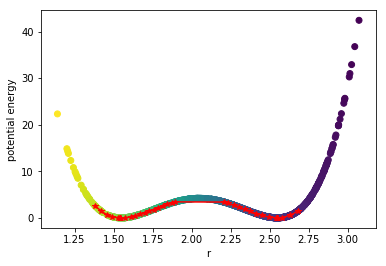

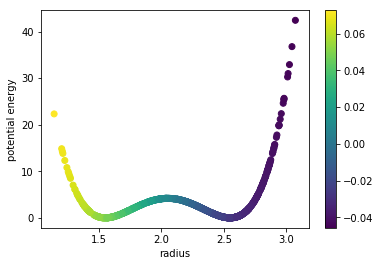

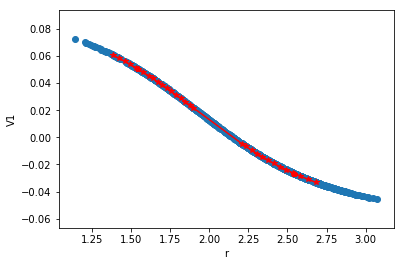

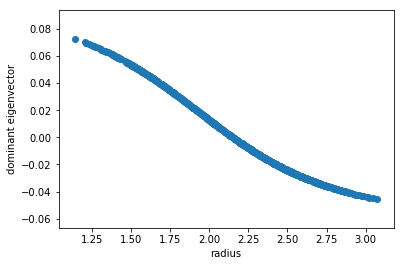

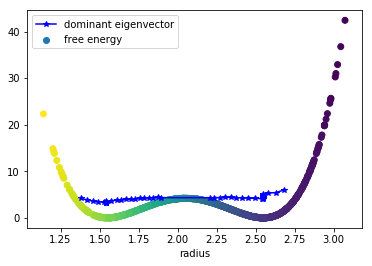

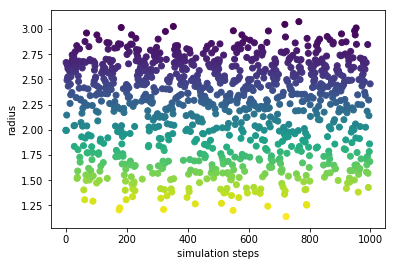

In [15]:
plotResults(freeEnergyRawTGT, freeEnergyWeightedTGT, V1TGT, lmTGT, EpotTGT, rTGT)
plotResults(freeEnergyRawST, freeEnergyWeightedST, V1ST, lmST, EpotST, rST)

plotAndSaveResults(freeEnergyRawTGT, freeEnergyWeightedTGT, V1TGT, lmTGT, EpotTGT, rTGT)
plotAndSaveResults(freeEnergyRawST, freeEnergyWeightedST, V1ST, lmST, EpotST, rST)

In [16]:
# Xmd = md.Trajectory(Xshort,  mdl.testsystem.topology)

# rmsd = md.rmsd(Xmd, Xmd[0])
# print(rmsd[0])

# plt.plot(rmsd[lm], freeEnergy, '*-b')
# #plt.plot(rmsd, r, '*b')
# plt.xlabel('rmsd')
# plt.ylabel('r')
# plt.show()


# Averages

In [17]:
imp.reload(stat)
#print(samplerAlgo.model.energy)
#print(weight)

weight=weightTGT
print('mean weight is '+repr(np.mean(weight)))

#-----------average energy
meanV = stat.computeAverages(Xshort, samplerAlgo.model.energy, units=samplerAlgo.model.energy_unit)
meanVunbiased = stat.computeUnbiasedAverages(Xshort, samplerAlgo.model.energy, weight, units=samplerAlgo.model.energy_unit)

print('Raw:')
print('<V> = '+repr(meanV*samplerAlgo.model.energy_unit))

print('\nUnbiased:')
print('<V> = '+repr(meanVunbiased*samplerAlgo.model.energy_unit))


#---------- average radius
def compute_radius_2_particles(X):
    return np.linalg.norm(X[0,:]-X[1,:], 2)
    
meanR = stat.computeAverages(Xshort, compute_radius_2_particles)
meanRunbiased = stat.computeUnbiasedAverages(Xshort, compute_radius_2_particles, weight)

print('\nExpected mean radius (state1+state2)/2 = '+repr(0.5*(min1+min2)))

print('Raw:')
print('<radius> = '+repr(meanR*samplerAlgo.model.x_unit))

print('\nUnbiased:')
print('<radius> = '+repr(meanRunbiased*samplerAlgo.model.x_unit))


mean weight is 0.0016523641458558332
Raw:
<V> = Quantity(value=14423378.58421875, unit=kilojoule/mole)

Unbiased:
<V> = Quantity(value=13283139.914016256, unit=kilojoule/mole)

Expected mean radius (state1+state2)/2 = Quantity(value=2.05, unit=angstrom)
Raw:
<radius> = Quantity(value=2.2373899151673493, unit=angstrom)

Unbiased:
<radius> = Quantity(value=2.1585998122930694, unit=angstrom)


10
3
(10000,)


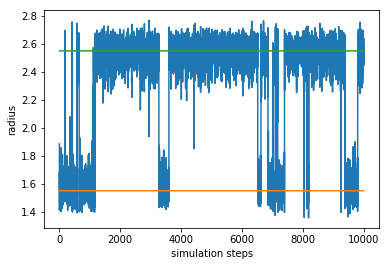

Initial radius: 1.8849581756761868
Mean radius: 2.3029574583536911


In [18]:
#---------------- load reference data - at lower temperature 
import glob
numpy_vars = []
for np_name in glob.glob('/Users/zofia/github/DFM/Data/Std/Traj/T100/*.h5'):
    numpy_vars.append(md.load(np_name))

traj = numpy_vars
print(len(traj))


import mdtraj as md
Xmdtraj=list()
for i in range(len(traj)):
    Xmdtraj.append(md.Trajectory(traj[i].xyz, mdl.testsystem.topology) )

print(Xmdtraj[0].xyz.shape[2])
L=int(Xmdtraj[0].xyz.shape[0]*len(traj))
nrP=int(Xmdtraj[0].xyz.shape[1])
D=int(Xmdtraj[0].xyz.shape[2])
X=np.zeros((L, nrP, D))
for i in range(0,len(Xmdtraj)):
        X[i*len(Xmdtraj[i].xyz):(i+1)*len(Xmdtraj[i].xyz),:,:]=Xmdtraj[i].xyz

Xref=X



#---------------- radius 
r=np.linalg.norm(X[:,0,:]-X[:,1,:], 2, axis=1)
print(r.shape)

plt.plot(range(len(r)), r)
plt.plot(range(len(r)), np.ones(len(r))*min1)
plt.plot(range(len(r)), np.ones(len(r))*min2)
plt.xlabel('simulation steps')
plt.ylabel('radius')
plt.show()

print("Initial radius: "+repr(np.linalg.norm(X[0, 0,:]-X[0, 1,:])))
print("Mean radius: " +repr(np.mean(r)))


#compute_weight_target_distribution(target_distribution, qImoportanceSampling)

In [19]:
maximalDataLength=2000

Xshortref=Xref
while(len(Xshortref)>maximalDataLength):
    Xshortref=Xshortref[::2]
#Xshort=X[::10]
print("Shape of input data: "+repr((Xshortref.shape)))



Xspref,levelsetsref, V1ref, lmref, qEmpref, Epotref, qTargetref =FE(Xshortref, epsilon, numberOfLandmarks, samplerAlgo, samplerAlgo.model, samplerAlgo.T, 'TMDiffmap')#'TMDiffmap')#'Diffmap')




Shape of input data: (1250, 2, 3)
Temperature in dominantEigenvectorDiffusionMap is Quantity(value=100.0, unit=kelvin)
constructing neighbor graph
neighbor graph done


Target temperature is Quantity(value=100.0, unit=kelvin)


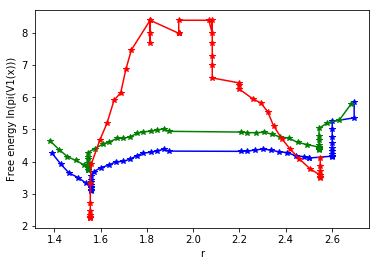

In [20]:
print("Target temperature is "+repr(samplerAlgo.T))
#qTargetref=np.exp(-Epotref/samplerAlgo.T)
#qTargetref=qTargetref/np.mean(qTargetref)
freeEnergyWeightedref, weightref, Ntilderef= computeFreeEnergyAtLandmarkedPoint(qTargetref, qEmpref, levelsetsref, method='weighted')
freeEnergyRawref= computeFreeEnergyAtLandmarkedPoint(qTargetref, qEmpref, levelsetsref, method='raw')

r=np.linalg.norm(Xshort[:,0,:]-Xshort[:,1,:], 2, axis=1)
rref=np.linalg.norm(Xshortref[:,0,:]-Xshortref[:,1,:], 2, axis=1)

freeEnergy=freeEnergyRawTGT
freeEnergyref=freeEnergyRawref

plt.plot(rTGT[lmTGT], freeEnergyRawTGT, '*-b')
plt.plot(rST[lmST], freeEnergyWeightedST, '*-g')
plt.plot(rref[lmref], freeEnergyref, '*-r')
plt.xlabel('r')
plt.ylabel('Free energy ln(pi(V1(x)))')
plt.show()


In [21]:
#plotResults(freeEnergyUnWeightedref, freeEnergyWeightedref, V1ref, lmref, Epotref, rref)

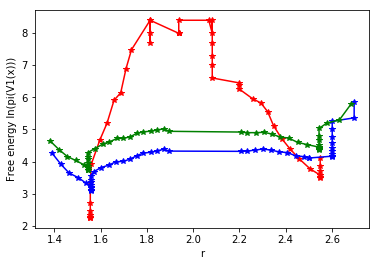

In [22]:
plt.plot(rref[lmref], freeEnergyRawref, '*-r')
plt.plot(rTGT[lmTGT], freeEnergyRawTGT, '*-b')
plt.plot(rST[lmST], freeEnergyWeightedST, '*-g')
plt.xlabel('r')
plt.ylabel('Free energy ln(pi(V1(x)))')
plt.show()

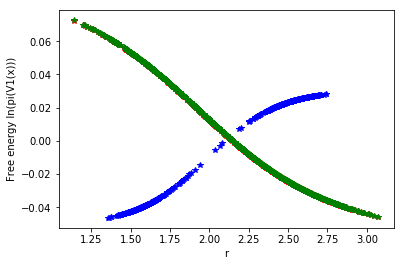

In [23]:
plt.plot(rref, V1ref, '*b')
plt.plot(rTGT, -(V1TGT), '*r')
plt.plot(rST, V1ST, '*g')
plt.xlabel('r')
plt.ylabel('Free energy ln(pi(V1(x)))')
plt.show()

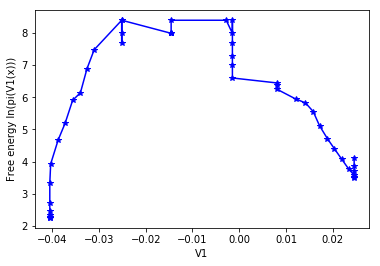

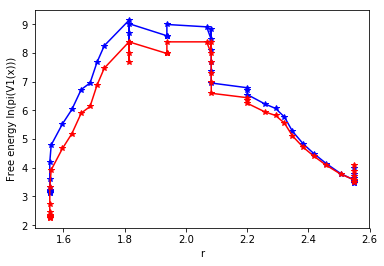

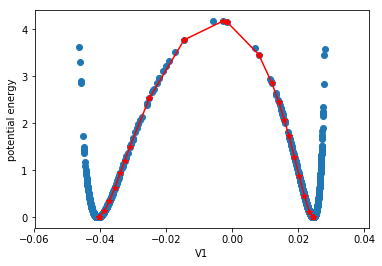

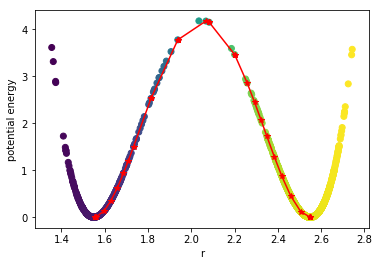

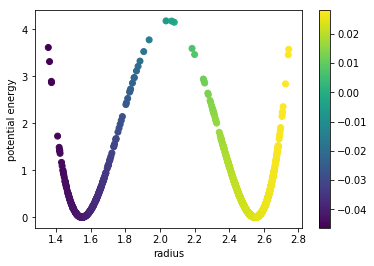

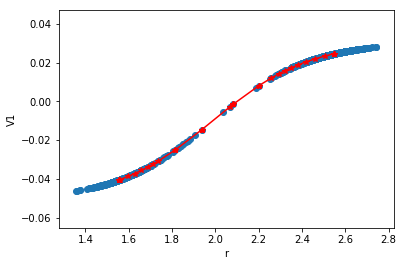

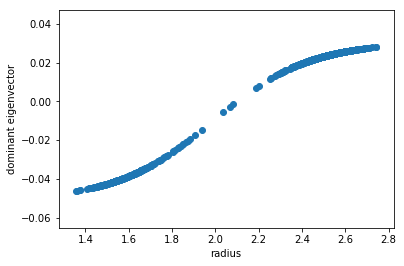

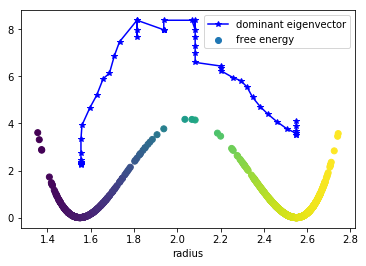

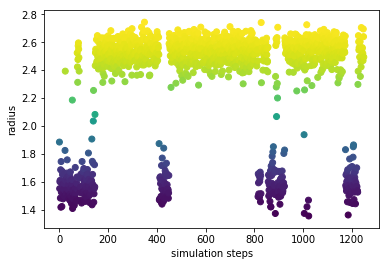

In [24]:
plotAndSaveResults(freeEnergyRawref, freeEnergyWeightedref, V1ref, lmref, Epotref, rref)

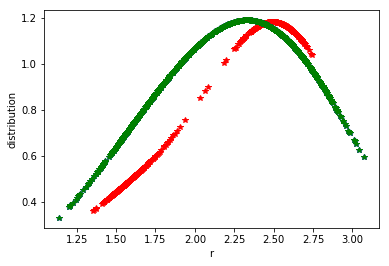

In [25]:
plt.plot(rref, qEmpref/np.mean(qEmpref), '*r')
plt.plot(rST, qEmpST/np.mean(qEmpST), '*b')
plt.plot(rTGT, qEmpTGT/np.mean(qEmpTGT), '*g')
#plt.plot(rTGT, qTargetTGT/np.mean(qTargetTGT), '*r')
plt.xlabel('r')
plt.ylabel('distribution')
plt.show()

(50,)
302.57563912
278.593046787


/Users/zofia/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


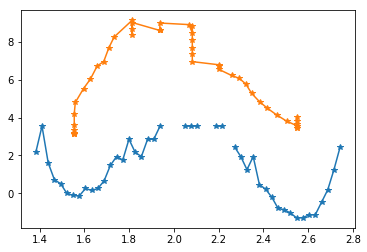

7520
(10000, 2, 3)
(752,)


In [33]:

def computeFreeEnergyAtRadius(r):
      
        H, c=np.histogram(r, numberOfLandmarks, normed=True)
        print(H.shape)
        
        return -np.log(H), c
    

def computeFreeEnergyAtLandmarkedPoint(qTarget, qEmp, levelsets, method='weighted'):
      
        if(method=='weighted'):
            weight, Ntilde = stat.compute_weight_target_distribution(qTarget, qEmp)
        
        
        K=len(levelsets)
        
        freeEnergy=np.zeros(K)
        h=np.zeros(K)

        for k in range(0,K):
            # simple histogram
            if(method == 'raw'):
                h[k] = np.sum(len(levelsets[k]))
            elif(method=='weighted'):
#              # unbiased histogram- we can use weights!!
                h[k] = np.sum(weight[levelsets[k]])
            
        for k in range(0,K):
            if(h[k] == 0):
                freeEnergy[k] = 0 # if the bin is empty set 0
            else:
                if(method == 'raw'):
                    freeEnergy[k] = -np.log(h[k]/sum(h))
                elif(method=='weighted'):
#              
                    freeEnergy[k] =  -np.log( h[k]/sum(h) / Ntilde)
                            
        if(method=='weighted'):
            return freeEnergy, weight, Ntilde, h
        else:
            return freeEnergy,h

freeEnergyWeightedref, weightref, Ntilderef, h= computeFreeEnergyAtLandmarkedPoint(qTargetref, qEmpref, levelsetsref, method='weighted')
freeEnergyRawref, h= computeFreeEnergyAtLandmarkedPoint(qTargetref, qEmpref, levelsetsref, method='raw')

FH, rc=computeFreeEnergyAtRadius(rref)

print(np.sum(freeEnergyWeightedref))


print(np.sum(freeEnergyRawref))
plt.plot(rc[1:], FH, '-*')
plt.plot(rref[lmref], freeEnergyWeightedref, '-*')
plt.show()

ll=0
for i in range(10):
    ll+=np.asarray(levelsetsref[0]).shape[0]
print(ll)
print(Xref.shape)
print(np.asarray(levelsetsref[0]).shape)